**FirstLY wll do the Training and Visualization of a Decision Tree**

In [5]:


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [6]:


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)



,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
!pip install graphviz



  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import os
from sklearn.tree import export_graphviz

# Define the folder where the image will be saved
IMAGES_PATH = "images/decision_trees"
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

#im trying to save the image but it aint working soo im stopping here





**Decision Trees dont req Feature Scaling**

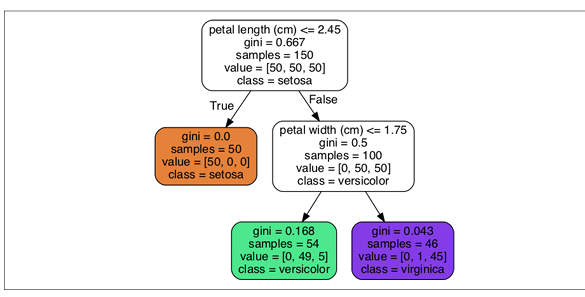


**Notations*                      
Samples: total instances    

Value: here the three [a1, a2, a3]                   
..............where a1: setosa                       
..............a2: versicolor                       
..............a3: virginica                     
gini(/ entropy also termed both are almost similar but gini is fast): measures its imputity            

..............where gini=0 for setosa as all are setosa                      

**Making Prediction**

Notes:                    
white box vs black box models         

Black Box:                       
You don’t know how the model makes decisions.                      
Example: Deep Neural Networks — high accuracy, low interpretability.                      

White Box:                     
You can understand how the model makes decisions.                      
Example: Decision Trees, Linear Regression — transparent and explainable.                

In [23]:
tree_clf.predict_proba([[5,1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [24]:
tree_clf.predict([[5,1.5]])

array([1])

**INFO**                     
CART (Classification and Regression Tree) Algorithm is used for Decision Trees

***REGRESSION***

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


*The resulting D Tree is* :


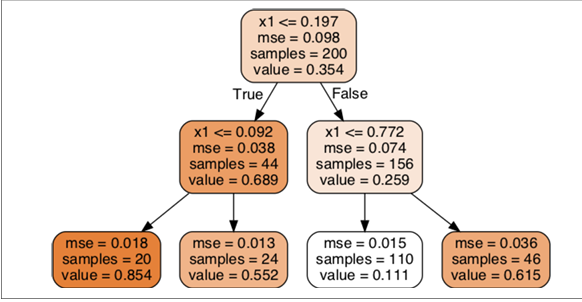

##🧠 Decision Tree Regressor

    Instead of drawing one continuous curve (like linear regression), it splits the 
    x-axis into intervals and predicts a constant value (average y) for each interval.


Each plot shows:

    Blue dots = the real data points.

    Red lines = the model's predictions (ŷ).

    Vertical lines = where the tree splits the data (called decision thresholds).

    Depth=0, Depth=1, etc. = levels of the decision tree.
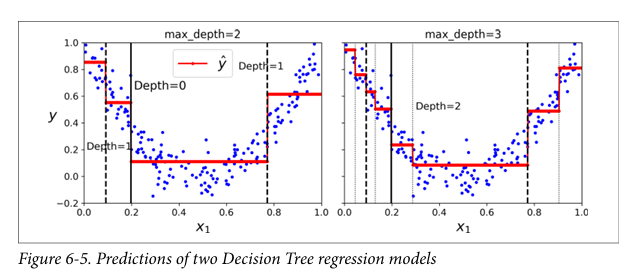

******LIMITATIONS OF DT********
On the left its divinding in a straight decision boundary BUT IF 
the points are rotated by 45* degree its not dividing in a straight line

**IN FACT: They are very sensitive to small variations**

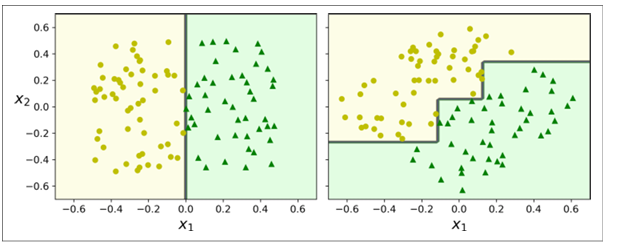